In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv('dvi-a2-ps3-data.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [66]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<h4> Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.<br>
Write down your observations in a markdown cell below. <h4>

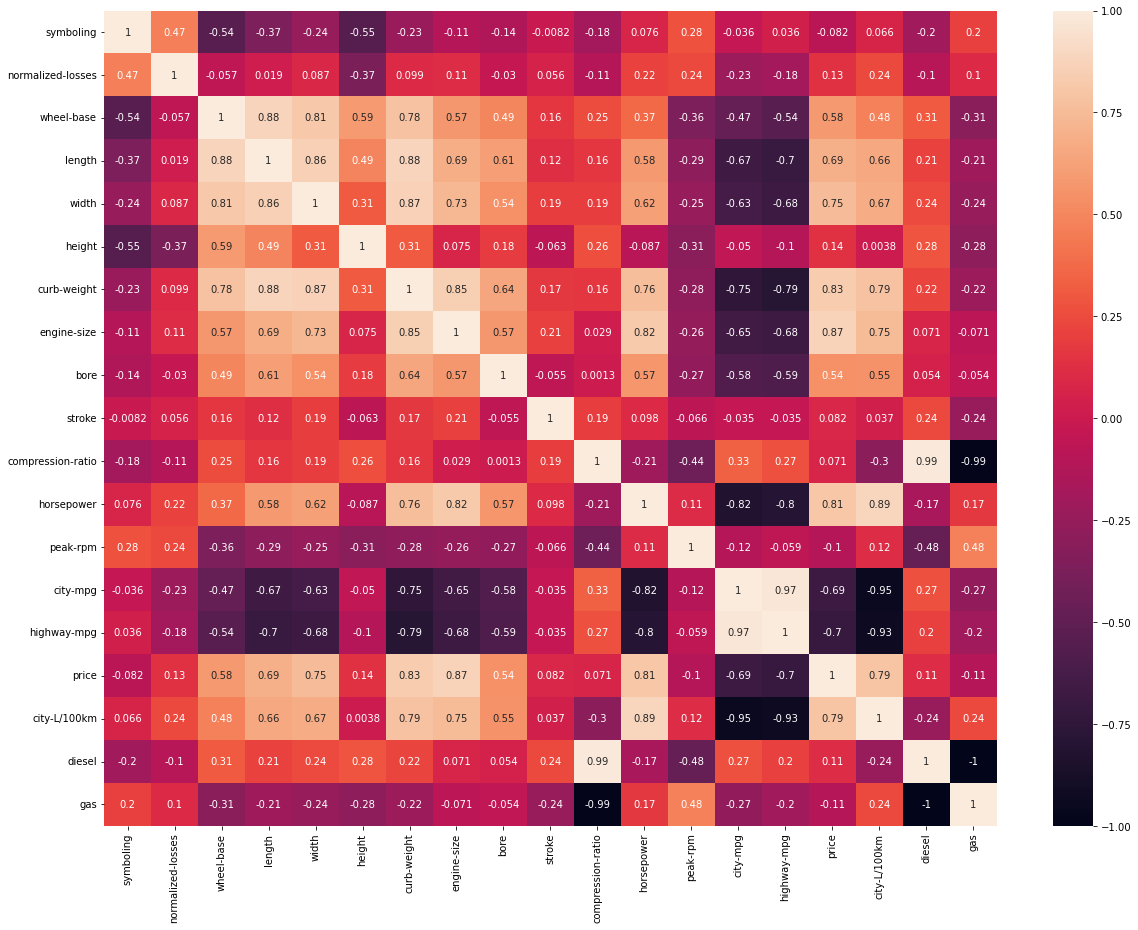

In [67]:
import seaborn as sns
plt.figure(figsize=(20,15))
corr_rel=df.corr()
sns.heatmap(corr_rel,annot=True)
plt.show()

In [68]:
hi_corr={}
med_corr={}
low_corr={}
correlation=[]
df1=df.iloc[:,1:]

correlation=df1.corr()

correlation = correlation.to_dict()

for i, j  in correlation.items():
    for k, l in j.items():
        if  i != k:
            if abs(l) >= 0.7:
                hi_corr.update( { i : k })
            elif abs(l) >0.5  or abs(l)< 0.7:
                med_corr.update({i: k})
            else:
                low_corr.update({i: k})
        
    
print("High correlation combinations are :")
for i, j in hi_corr.items():
    print(i ,' : ', j)
print("Medium correlation combinations are :")
for i, j in med_corr.items():
    print(i ,' : ', j)
print("Low correlation combinations are :")
for i, j in low_corr.items():
    print(i ,' : ', j)

High correlation combinations are :
wheel-base  :  curb-weight
length  :  curb-weight
width  :  price
curb-weight  :  city-L/100km
engine-size  :  city-L/100km
compression-ratio  :  gas
horsepower  :  city-L/100km
city-mpg  :  city-L/100km
highway-mpg  :  city-L/100km
price  :  city-L/100km
city-L/100km  :  price
diesel  :  gas
gas  :  diesel
Medium correlation combinations are :
normalized-losses  :  gas
wheel-base  :  gas
length  :  gas
width  :  gas
height  :  gas
curb-weight  :  gas
engine-size  :  gas
bore  :  gas
stroke  :  gas
compression-ratio  :  city-L/100km
horsepower  :  gas
peak-rpm  :  gas
city-mpg  :  gas
highway-mpg  :  gas
price  :  gas
city-L/100km  :  gas
diesel  :  city-L/100km
gas  :  city-L/100km
Low correlation combinations are :


### Question 1
<h4>What kind of a correlation exists between<br><br>
    a."engine-size" and "price"<br><br>
    b."highway-mpg" and "price"<br><br>
    c."peak-rpm" and "price"<br><br>
    Use appropriate visuals to demonstrate the same.Use subplots.
<h4>Clearly mention in markdown cells below the visual <br><br>1.You obseravtaion about the relationship. Which among engine-size, highway-mpg and peak-rpm is a potential predictor variable of price.<br>
    2.Mention the pre-attentive attributes used.(atleast 2)<br>
                    3.Mention the gestalt principles used.(atleast 2)<br>
   

[[1.         0.87233517]
 [0.87233517 1.        ]]


<AxesSubplot:>

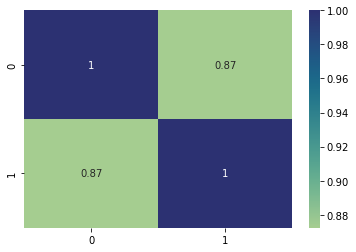

In [69]:

pearson_coeff_engine_size=np.corrcoef(df['engine-size'],df['price']) 
print(pearson_coeff_engine_size)
sns.heatmap(pearson_coeff,annot=True,cmap='crest')

[[ 1.         -0.70469227]
 [-0.70469227  1.        ]]


<AxesSubplot:>

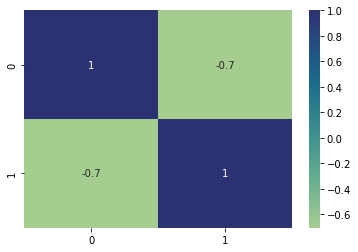

In [70]:
pearson_coeff_high_mpg=np.corrcoef(df['highway-mpg'],df['price']) 
print(pearson_coeff_high_mpg)
sns.heatmap(pearson_coeff_high_mpg,annot=True,cmap='crest')

[[ 1.         -0.10161587]
 [-0.10161587  1.        ]]


<AxesSubplot:>

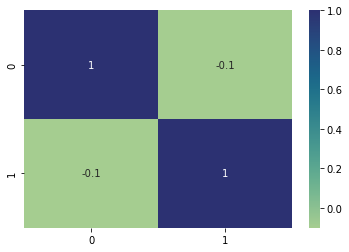

In [71]:
pearson_coeff_peak_rpm=np.corrcoef(df['peak-rpm'],df['price']) 
print(pearson_coeff_peak_rpm)
sns.heatmap(pearson_coeff_peak_rpm,annot=True,cmap='crest')

<AxesSubplot:xlabel='body-style', ylabel='price'>

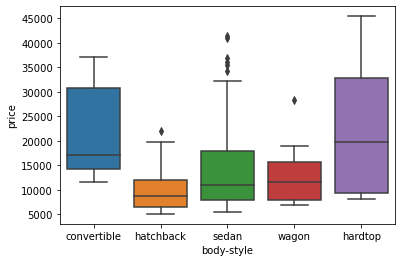

In [72]:
sns.boxplot(x=df['body-style'],y=df['price'])

<AxesSubplot:xlabel='engine-location', ylabel='price'>

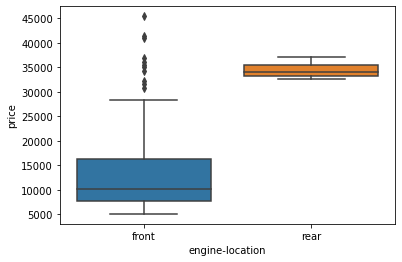

In [73]:
sns.boxplot(x=df['engine-location'],y=df['price'])

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

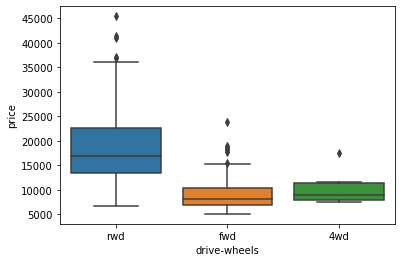

In [74]:
sns.boxplot(x=df['drive-wheels'],y=df['price'])